# Polynomial Regression

Boston Housing Dataset on [Kaggle](https://www.kaggle.com/c/boston-housing) and [UCI](https://archive.ics.uci.edu/ml/index.php)

In [1]:
# Import Pkgs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
col_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"]

In [4]:
#Getting the Dataset
boston_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                     sep='\s+', 
                     names=col_names)

In [5]:
# Check
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# DataFrame Shape
boston_df.shape

(506, 14)

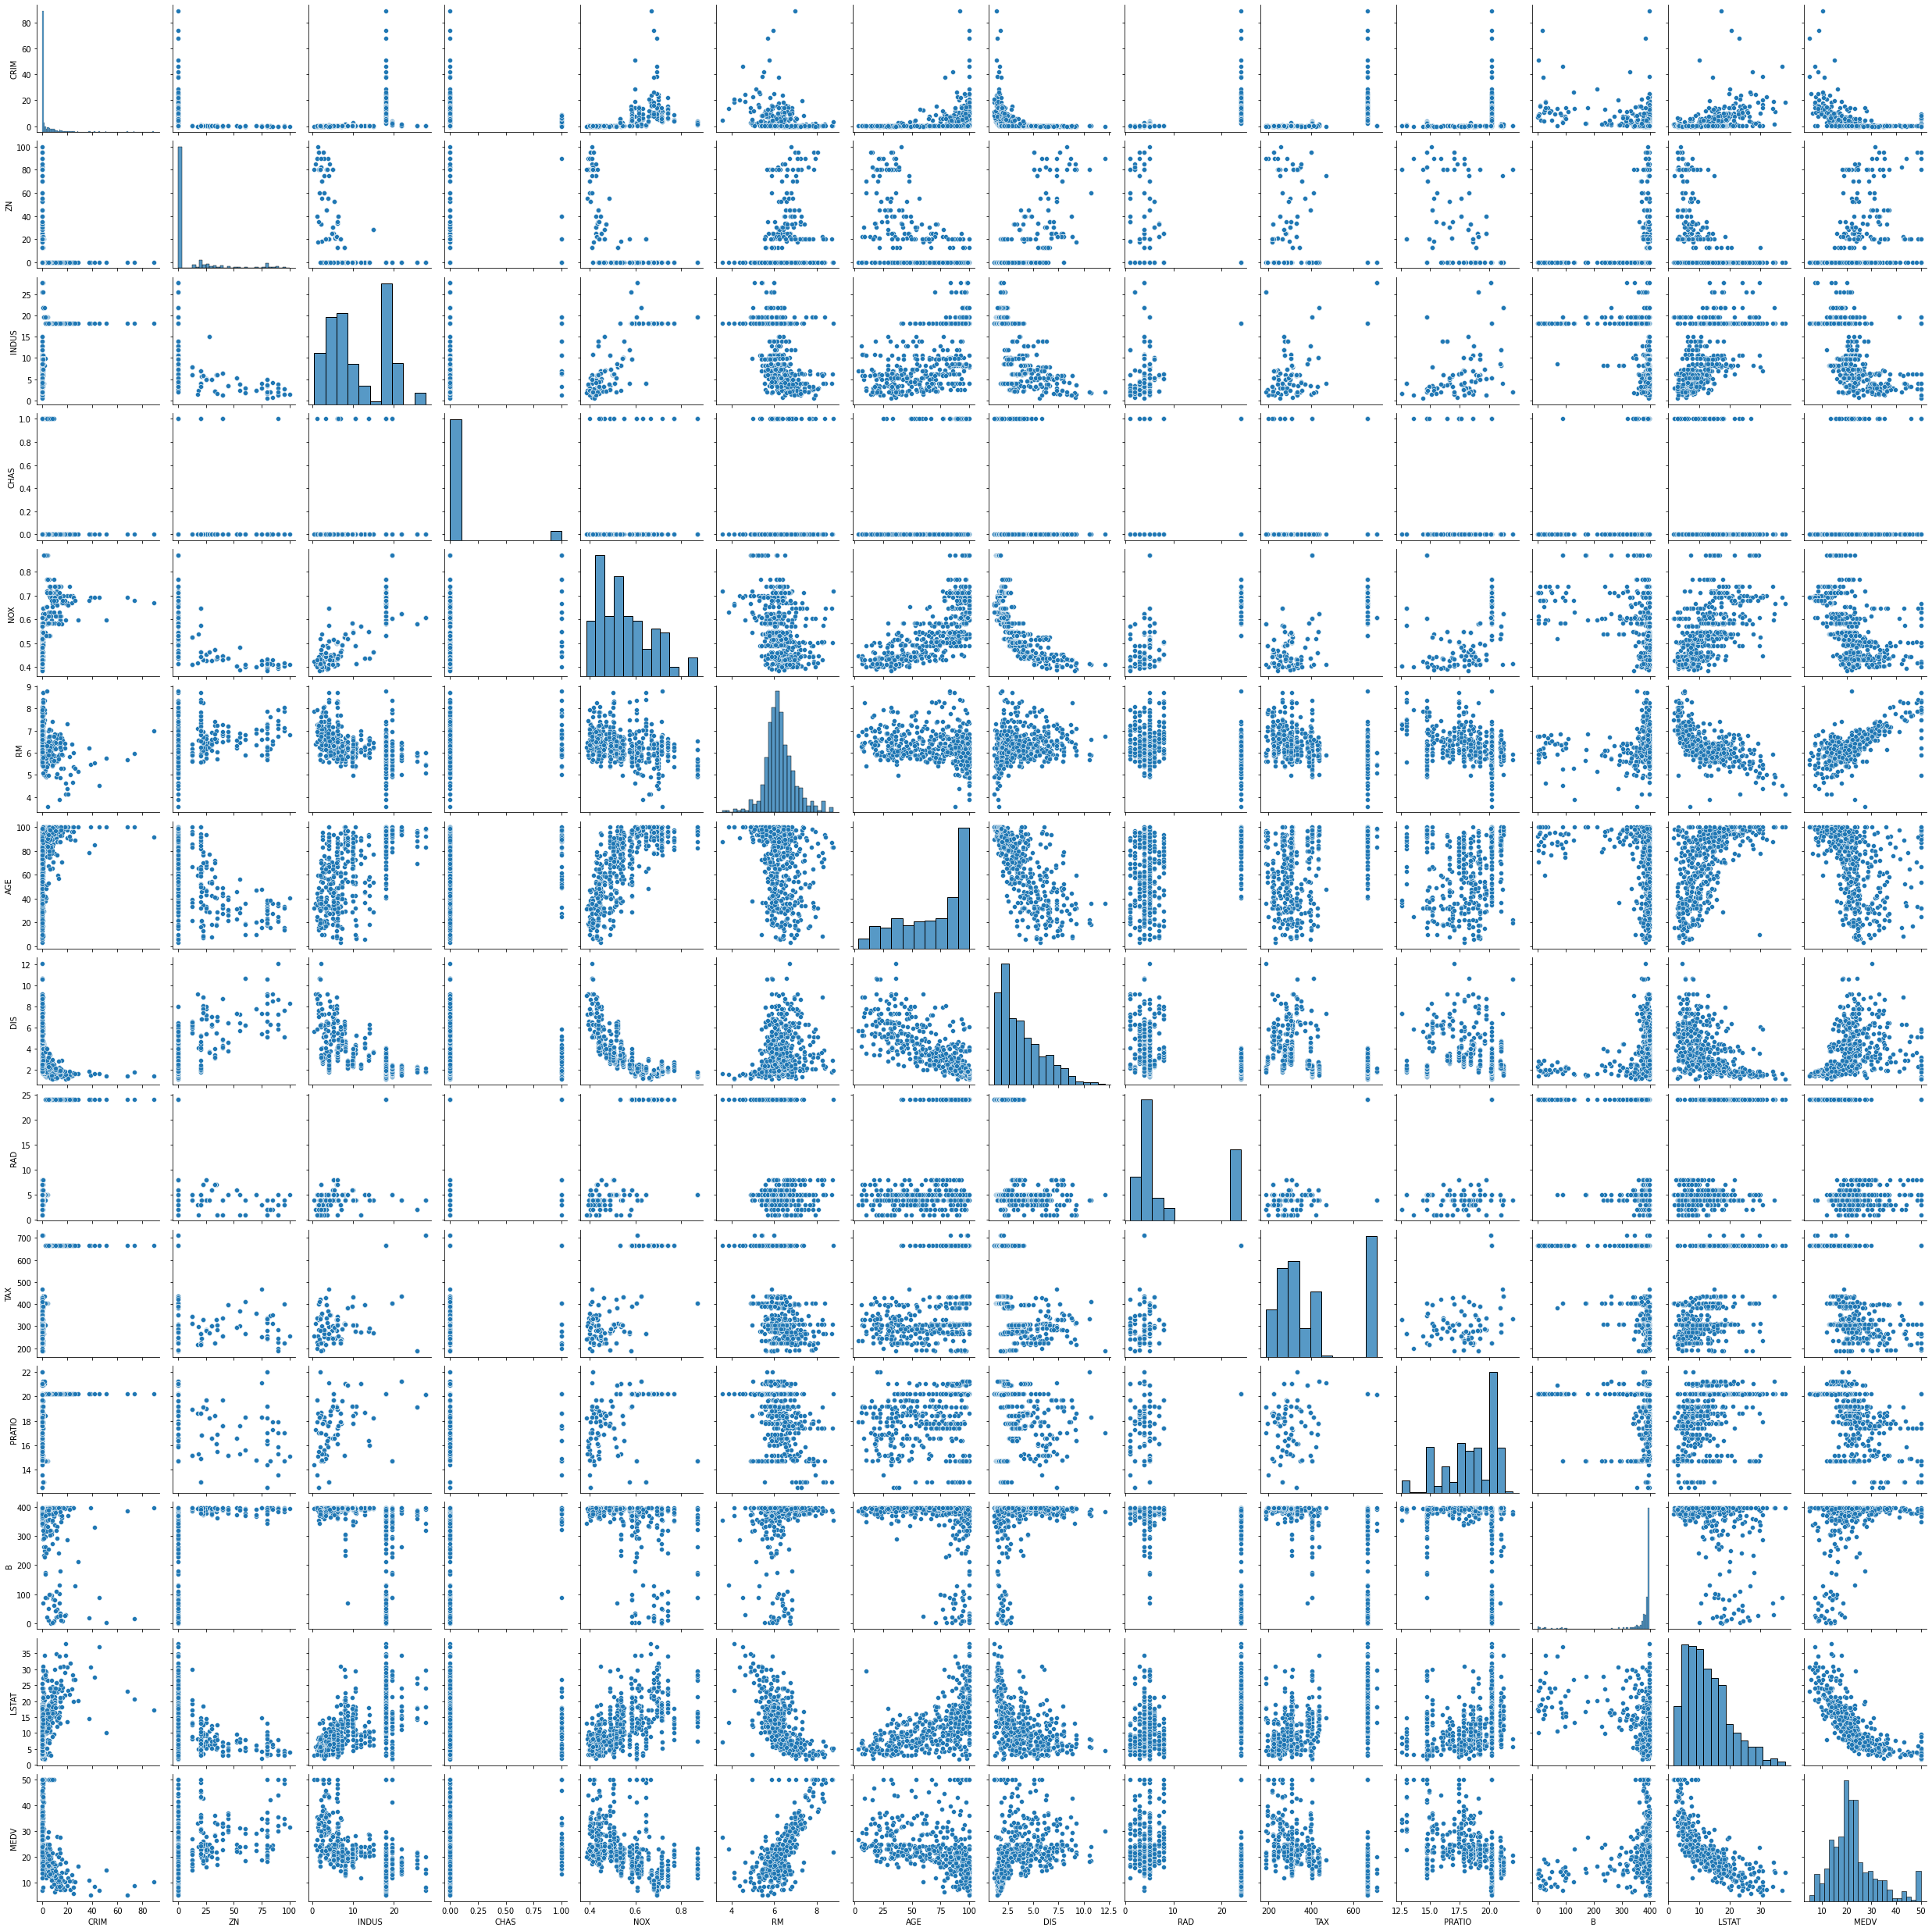

In [7]:
# Pairplot
sns.pairplot(boston_df)

#### Narrative: MEDV and LSTAT have a non linear relationship

In [9]:
# X and y
X = boston_df[["LSTAT"]].values
y= boston_df["MEDV"].values

In [10]:
# Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=72)

In [11]:
# Poly Features Creation
polyfeats = PolynomialFeatures(degree=2) # We are creating polynomial features of 2nd degree

In [12]:
# Transforming our X in 2nd degree poly
X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.transform(X_test)

In [13]:
# Check
print(X_train[:3])
print(X_train_poly[:3])

[[15.37]
 [18.35]
 [ 5.33]]
[[  1.      15.37   236.2369]
 [  1.      18.35   336.7225]
 [  1.       5.33    28.4089]]


In [14]:
15.37 * 15.37

236.23689999999996

In [15]:
18.35 * 18.35

336.7225

In [16]:
# Create Polynomial Features Till 10th Degree

for i in range(1,11):
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    regressor=LinearRegression()
    regressor.fit(X_train_poly, y_train)
    y_pred = regressor.predict(X_test_poly)
    
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=37.05834547432803 R2=0.4893561124913317
DEGREE 2: MSE=33.525585460465855 R2=0.5380356281044465
DEGREE 3: MSE=32.72988633274506 R2=0.5489999302249522
DEGREE 4: MSE=31.486324237292305 R2=0.5661355409666763
DEGREE 5: MSE=31.22016735521769 R2=0.5698030383470954
DEGREE 6: MSE=31.246250790911926 R2=0.5694436227598099
DEGREE 7: MSE=31.294435498810536 R2=0.568779663636841
DEGREE 8: MSE=31.31860162944206 R2=0.5684466674727171
DEGREE 9: MSE=31.095267424478255 R2=0.571524091604223
DEGREE 10: MSE=31.195588995596033 R2=0.5701417148029692


#### Narrative: Model improves till 5th degree then start getting worse, this is due to OVERFITTING

In [18]:
# X (all features) and y
X = boston_df.drop("MEDV",axis=1).values
y = boston_df["MEDV"].values

In [19]:
# Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=72)

In [20]:
# Create Polynomial Features Till 5th Degree

for i in range(1,6):
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    regressor=LinearRegression()
    regressor.fit(X_train_poly, y_train)
    y_pred = regressor.predict(X_test_poly)
    
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print("DEGREE "+str(i)+": MSE="+str(mse)+" R2="+str(r2))

DEGREE 1: MSE=22.380104659274487 R2=0.6916143044222076
DEGREE 2: MSE=28.969417048762796 R2=0.600817155992894
DEGREE 3: MSE=31345.649901184657 R2=-430.92604303165757
DEGREE 4: MSE=3712.2792284269954 R2=-50.15319295716654
DEGREE 5: MSE=2627.2565877247152 R2=-35.20216985585308
